## Análise Exploratória do Mercado de Ciência e Análise de Dados - Pedro Silva

### Sobre o Conjunto de Dados:

#### work_year
Descrição: Ano em que os dados salariais foram registrados.
Tipo: Numérico (inteiro).
#### job_title
Descrição: Título do cargo desempenhado pelo profissional na área de dados.
Tipo: Categórico.
#### job_category
Descrição: Categoria geral à qual o cargo pertence.
Tipo: Categórico.
#### salary_currency
Descrição: Moeda na qual o salário foi originalmente reportado.
Tipo: Categórico.
#### salary
Descrição: Valor do salário bruto anual reportado na moeda original.
Tipo: Numérico.
#### salary_in_usd
Descrição: Valor do salário bruto anual convertido para dólares americanos (USD) para padronização.
Tipo: Numérico.
#### employee_residence
Descrição: País de residência do funcionário.
Tipo: Categórico.
#### experience_level
Descrição: Nível de experiência profissional do colaborador.
Tipo: Categórico.
Exemplo:
EN (Entry-Level) – Iniciante.
MI (Mid-Level) – Intermediário.
SE (Senior-Level) – Experiente.
EX (Executive) – Executivo.
#### employment_type
Descrição: Tipo de contrato de trabalho.
Tipo: Categórico.
Exemplo:
FT (Full-Time) – Integral.
PT (Part-Time) – Parcial.
CT (Contract) – Contrato.
FL (Freelance) – Freelancer.
#### work_setting
Descrição: Ambiente de trabalho predominante.
Tipo: Categórico.
Exemplo:
On-Site (Presencial).
Remote (Remoto).
Hybrid (Híbrido).
#### company_location
Descrição: País onde a empresa está localizada.
Tipo: Categórico.
#### company_size
Descrição: Tamanho da empresa com base no número de funcionários.
Tipo: Categórico.
Exemplo:
S (Small) – Pequena (1-50 funcionários).
M (Medium) – Média (51-250 funcionários).
L (Large) – Grande (251 ou mais funcionários).

### Conclusão:

Com base nessas variáveis, o dataset fornece uma visão abrangente sobre os salários no mercado de ciência e análise de dados, possibilitando análises de padrões salariais, fatores influentes e tendências de contratação.

### Iniciando Análise Exploratória de Dados:

In [3]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carregando dataframe
df = pd.read_csv("jobs_in_data.csv")

In [5]:
# Formatando saída de dados
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

### Compreendendo o Conjunto de Dados:

In [35]:
# Visualizando as primeiras 5 linhas do dataset
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [5]:
# Analisando as dimensões do arquivo
df.shape

(9355, 12)

In [6]:
# Verificando informações do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [7]:
# Verificando valores nulos
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [38]:
# Total de valores únicos de cada variável
valores_unicos = []
for i in df.columns[0:12].tolist():
    print(i,':', len(df[i].astype(str).value_counts()))
    valores_unicos.append(len(df[i].astype(str).value_counts()))

work_year : 4
job_title : 125
job_category : 10
salary_currency : 11
salary : 1507
salary_in_usd : 1786
employee_residence : 83
experience_level : 4
employment_type : 4
work_setting : 3
company_location : 70
company_size : 3


### Visualizando Medidas Estatísticas do Conjunto de Dados:
Contagem | Média | Desvio Padrão | Quartis | Mediana | Valores Mínimos e Máximos

In [83]:
# Visualizando estatísticas das variáveis quantitativas contínuas do dataset
df.describe()

,work_year,salary,salary_in_usd
count,9355.00,9355.00,9355.00
mean,2022.76,149927.98,150299.50
std,0.52,63608.84,63177.37
min,2020.00,14000.00,15000.00
25%,2023.00,105200.00,105700.00
50%,2023.00,143860.00,143000.00
75%,2023.00,187000.00,186723.00
max,2023.00,450000.00,450000.00


### Avaliando Variáveis Individualmente:

In [30]:
# Total de indivíduos por cargo
df.groupby(['job_title']).size().sort_values(ascending=False)

job_title
Data Engineer                           2195
Data Scientist                          1989
Data Analyst                            1388
Machine Learning Engineer                991
Applied Scientist                        272
                                        ... 
Manager Data Management                    1
Cloud Data Architect                       1
Deep Learning Researcher                   1
Machine Learning Operations Engineer       1
Staff Machine Learning Engineer            1
Length: 125, dtype: int64

In [43]:
# Total de indivíduos por categoria de trabalho
df.groupby(['job_category']).size().sort_values(ascending=False)

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
dtype: int64

<AxesSubplot:title={'center':'Categoria de Trabalho'}>

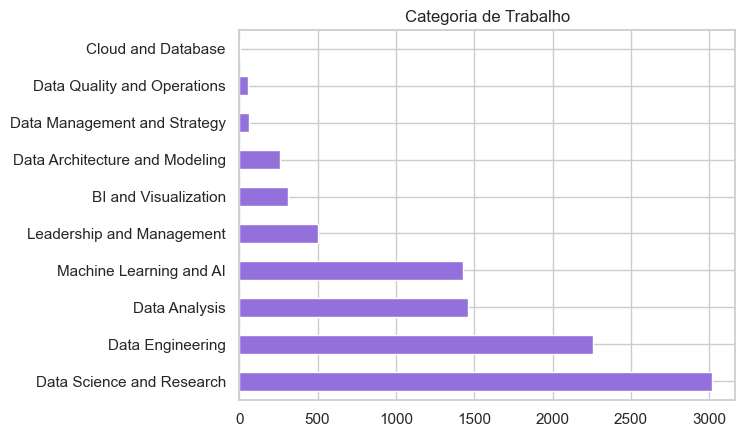

In [42]:
# Visualizando através de um gráfico
df.job_category.value_counts().plot(kind='barh', title='Categoria de Trabalho', color='mediumpurple')

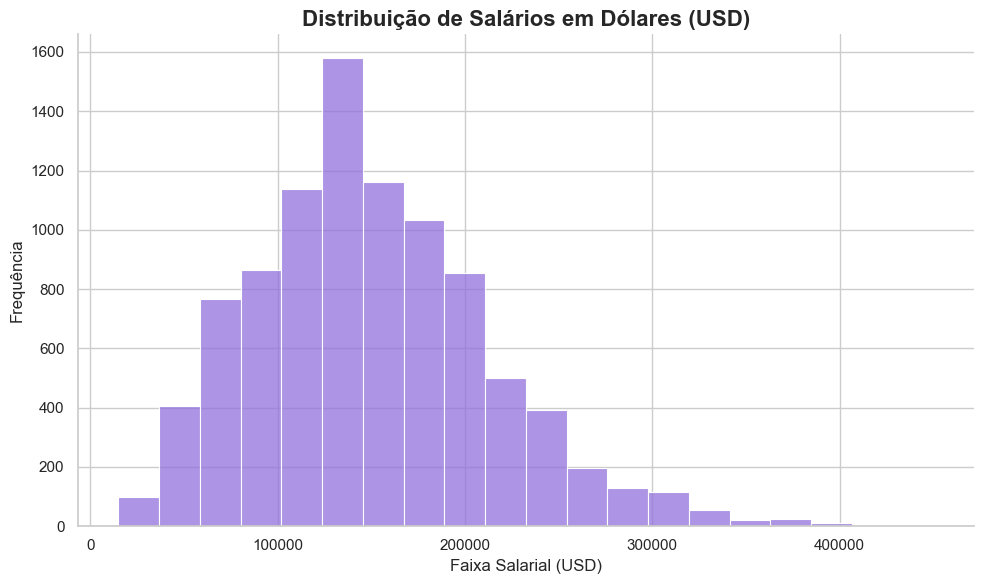

In [25]:
# Distribuição de salários em USD

# Configurando estilo com Seaborn
sns.set_theme(style="whitegrid", palette="pastel")

# Criar figura
plt.figure(figsize=(10, 6))

# Gerar o histograma
sns.histplot(data=df, x="salary_in_usd", bins=20, color="mediumpurple", edgecolor="white", linewidth=0.8)

# Títulos e rótulos
plt.title("Distribuição de Salários em Dólares (USD)", fontsize=16, fontweight="bold", loc="center")
plt.xlabel("Faixa Salarial (USD)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)

# Remover ruídos estéticos
sns.despine(top=True, right=True)

# Mostrar o gráfico
plt.tight_layout()  # Garante que os elementos se ajustem corretamente
plt.show()

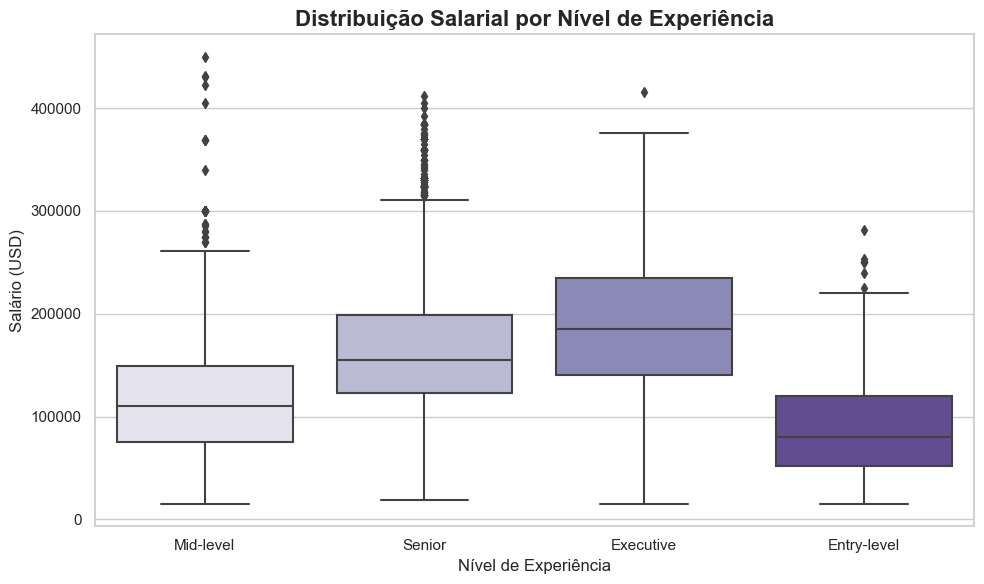

In [55]:
# Salário por nível de experiência

# Configurar estilo
sns.set_theme(style="whitegrid", palette="pastel")

# Criar a figura e os eixos
plt.figure(figsize=(10, 6))

# Criar o boxplot
sns.boxplot(data=df, x="experience_level", y="salary_in_usd", palette="Purples")

# Títulos e rótulos
plt.title("Distribuição Salarial por Nível de Experiência", fontsize=16, fontweight="bold")
plt.xlabel("Nível de Experiência", fontsize=12)
plt.ylabel("Salário (USD)", fontsize=12)

# Ajustar o layout e exibir
plt.tight_layout()
plt.show()

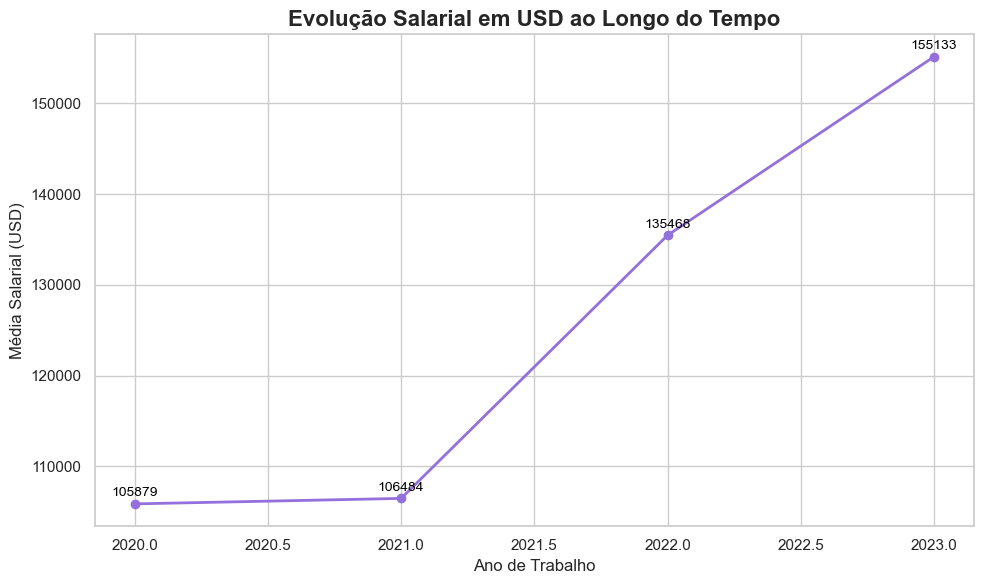

In [53]:
# Configurando estilo
sns.set_theme(style="whitegrid")

# Calcular a média salarial por ano
salario_por_ano = df.groupby("work_year")["salary_in_usd"].mean().reset_index()

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(salario_por_ano["work_year"], salario_por_ano["salary_in_usd"], color="mediumpurple", linewidth=2, marker="o")

# Adicionar rótulos aos pontos
for x, y in zip(salario_por_ano["work_year"], salario_por_ano["salary_in_usd"]):
    plt.text(x, y + 500, f'{y:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Títulos e rótulos
plt.title("Evolução Salarial em USD ao Longo do Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Ano de Trabalho", fontsize=12)
plt.ylabel("Média Salarial (USD)", fontsize=12)

# Ajustar o layout e exibir
plt.tight_layout()
plt.show()


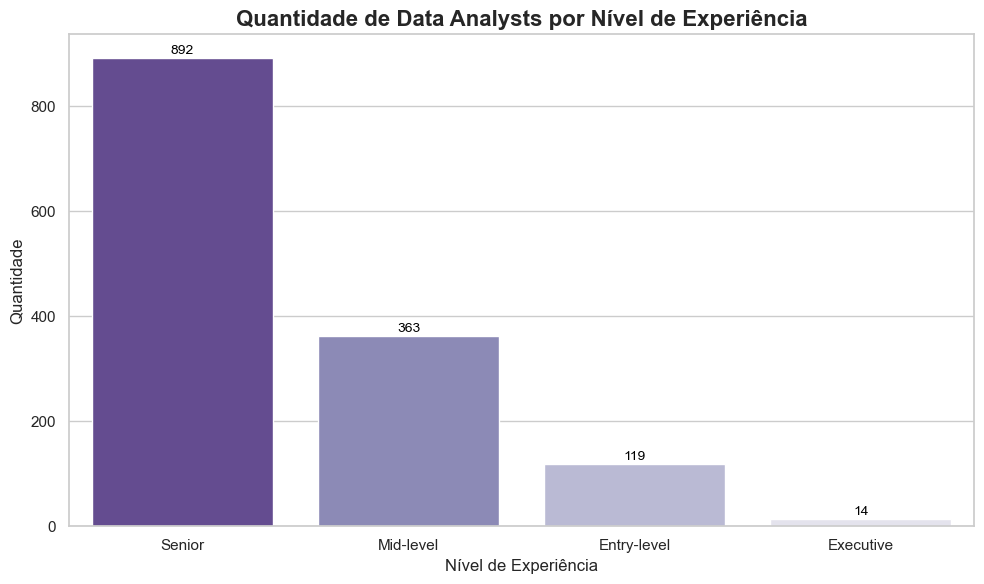

In [ ]:
# Quantidade de Data Analysts por Nível de Experiência

# Filtrando para um cargo específico
cargo_especifico = "Data Analyst"  # Verificando se o valor existe em "job_title"
df_cargo = df[df["job_title"] == cargo_especifico]

# Configurando estilo
sns.set_theme(style="whitegrid")

# Verificando se o dataframe não está vazio
if not df_cargo.empty:
    # Criando o gráfico
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(
        data=df_cargo,
        x="experience_level",
        palette="Purples_r",
        order=df_cargo["experience_level"].value_counts().index
    )

    # Adicionando rótulos de valores diretamente nas barras
    for p in ax.patches:
        ax.annotate(
            format(int(p.get_height()), ','),  # Formata o valor como inteiro
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Define a posição
            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points'
        )
    
    # Títulos e rótulos
    plt.title(f"Quantidade de {cargo_especifico}s por Nível de Experiência", fontsize=16, fontweight="bold")
    plt.xlabel("Nível de Experiência", fontsize=12)
    plt.ylabel("Quantidade", fontsize=12)
    
    # Ajustar layout e exibir
    plt.tight_layout()
    plt.show()
else:
    print(f"Nenhum dado encontrado para o cargo: {cargo_especifico}")


#### 64% dos Analistas de Dados são Sênior

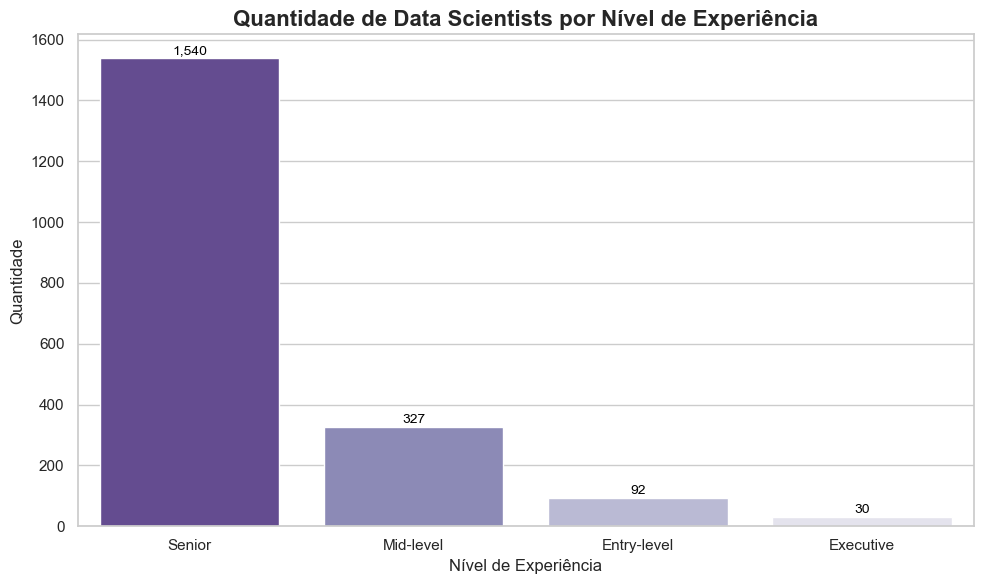

In [9]:
# Quantidade de Data Scientists por Nível de Experiência

# Filtrando para um cargo específico
cargo_especifico = "Data Scientist"  # Verificando se o valor existe em "job_title"
df_cargo = df[df["job_title"] == cargo_especifico]

# Configurando estilo
sns.set_theme(style="whitegrid")

# Verificando se o dataframe não está vazio
if not df_cargo.empty:
    # Criando o gráfico
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(
        data=df_cargo,
        x="experience_level",
        palette="Purples_r",
        order=df_cargo["experience_level"].value_counts().index
    )

    # Adicionando rótulos de valores diretamente nas barras
    for p in ax.patches:
        ax.annotate(
            format(int(p.get_height()), ','),  # Formata o valor como inteiro
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Define a posição
            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points'
        )
    
    # Títulos e rótulos
    plt.title(f"Quantidade de {cargo_especifico}s por Nível de Experiência", fontsize=16, fontweight="bold")
    plt.xlabel("Nível de Experiência", fontsize=12)
    plt.ylabel("Quantidade", fontsize=12)
    
    # Ajustar layout e exibir
    plt.tight_layout()
    plt.show()
else:
    print(f"Nenhum dado encontrado para o cargo: {cargo_especifico}")


#### 77% dos Cientistas de Dados são Sênior

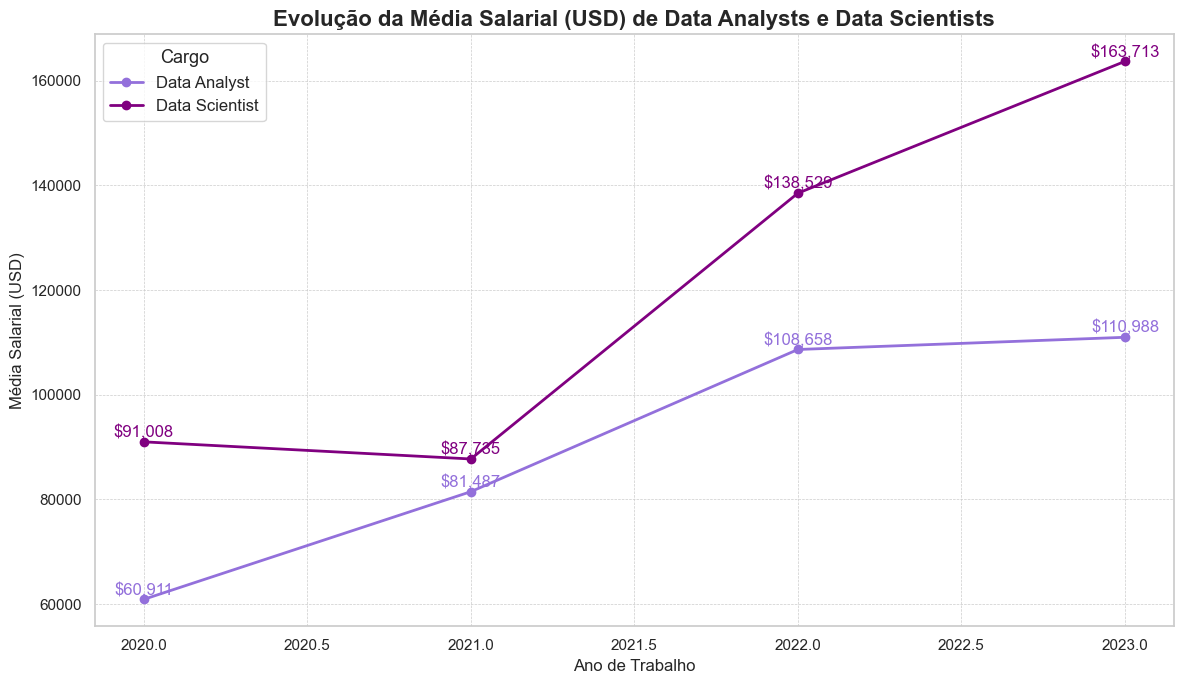

In [14]:
# Evolução Salarial dos Analistas de Cientistas de Dados

# Filtrando dados para os cargos de interesse
cargos_interesse = ["Data Analyst", "Data Scientist"]
df_cargos = df[df["job_title"].isin(cargos_interesse)]

# Calculando a média salarial por ano e por cargo
media_salarial = df_cargos.groupby(["work_year", "job_title"])["salary_in_usd"].mean().reset_index()

# Identificando o cargo com maior evolução salarial
evolucao_salarial = media_salarial.pivot(index="work_year", columns="job_title", values="salary_in_usd")
evolucao_salarial["dif_salarial"] = evolucao_salarial.diff().sum()  # Soma das diferenças ano a ano
cargo_mais_evoluido = evolucao_salarial["dif_salarial"].idxmax()

# Configurando as cores: roxo escuro para o cargo com maior evolução
cores = {"Data Analyst": "mediumpurple", "Data Scientist": "purple"}

# Criando o gráfico
plt.figure(figsize=(12, 7))
for cargo in cargos_interesse:
    subset = media_salarial[media_salarial["job_title"] == cargo]
    plt.plot(
        subset["work_year"],
        subset["salary_in_usd"],
        label=cargo,
        color=cores[cargo],
        linewidth=2.5 if cargo == cargo_mais_evoluido else 2,
        marker="o",
    )
    # Adicionando rótulos de dados
    for _, row in subset.iterrows():
        plt.text(
            row["work_year"],
            row["salary_in_usd"] + 1000,  # Ajuste para posicionar acima do ponto
            f"${int(row['salary_in_usd']):,}",
            fontsize=12,
            ha="center",
            color=cores[cargo],
        )

# Configurando o título, rótulos e legendas
plt.title("Evolução da Média Salarial (USD) de Data Analysts e Data Scientists", fontsize=16, fontweight="bold")
plt.xlabel("Ano de Trabalho", fontsize=12)
plt.ylabel("Média Salarial (USD)", fontsize=12)
plt.legend(title="Cargo", fontsize=12, title_fontsize=13)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Melhorando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()


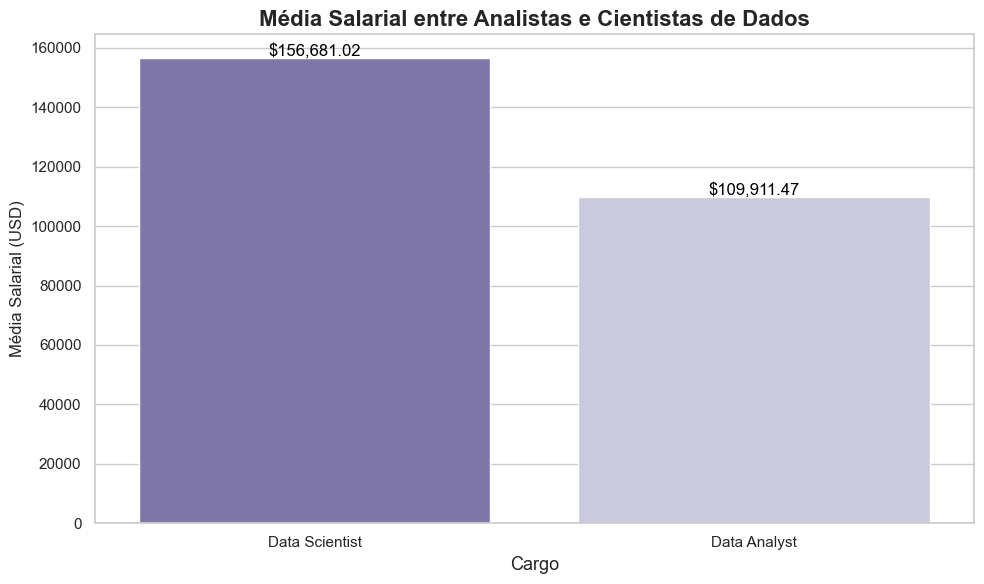

In [11]:
# Média Salarial dos Analistas e Cientistas de Dados:

# Filtrando dados para os cargos de interesse
cargos_interesse = ["Data Analyst", "Data Scientist"]
df_cargos = df[df["job_title"].isin(cargos_interesse)]

# Calculando a média salarial por cargo
media_salarial = df_cargos.groupby("job_title")["salary_in_usd"].mean().reset_index()

# Ordenando os dados pelas maiores médias salariais
media_salarial = media_salarial.sort_values(by="salary_in_usd", ascending=False)

# Configurando estilo
sns.set_theme(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=media_salarial,
    x="job_title",
    y="salary_in_usd",
    palette="Purples_r",
    order=media_salarial["job_title"]
)

# Adicionando rótulos de valores diretamente nas barras
for p in ax.patches:
    ax.annotate(
        f"${p.get_height():,.2f}",  # Formata o valor com duas casas decimais
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Define a posição
        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )

# Títulos e rótulos
plt.title("Média Salarial entre Analistas e Cientistas de Dados", fontsize=16, fontweight="bold")
plt.xlabel("Cargo", fontsize=13)
plt.ylabel("Média Salarial (USD)", fontsize=12)

# Ajustar layout e exibir
plt.tight_layout()
plt.show()



### Conclusão da Análise Exploratória:

 
A análise exploratória de dados revelou padrões importantes, como a predominância de profissionais de nível sênior em cargos de análise e ciência de dados, além de diferenças salariais significativas entre esses papéis. Também identificamos tendências salariais ao longo dos anos, destacando o impacto de fatores como experiência e cargo na remuneração. Esses insights oferecem uma base sólida para as próximas etapas do projeto, como a realização de **testes estatísticos** para confirmar hipóteses e aprofundar a compreensão sobre os fatores que influenciam a evolução salarial no setor.